In [190]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, precision_score, roc_auc_score, roc_curve, accuracy_score



hypothesis:Age, location and device are all three factors related to customer churn.

In [191]:
df = pd.read_csv('C:/Users/DELL/Desktop/churn_data.csv')

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              10000 non-null  int64  
 1   CustomerID              10000 non-null  int64  
 2   Age                     10000 non-null  int64  
 3   Location                10000 non-null  object 
 4   Device                  10000 non-null  object 
 5   Month_1_Spend           10000 non-null  float64
 6   Month_1_Items           10000 non-null  int64  
 7   Month_1_Support_Calls   10000 non-null  int64  
 8   Month_2_Spend           10000 non-null  float64
 9   Month_2_Items           10000 non-null  int64  
 10  Month_2_Support_Calls   10000 non-null  int64  
 11  Month_3_Spend           10000 non-null  float64
 12  Month_3_Items           10000 non-null  int64  
 13  Month_3_Support_Calls   10000 non-null  int64  
 14  Month_4_Spend           10000 non-null 

In [193]:
df.describe()

,Unnamed: 0,CustomerID,Age,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4999.50000,5000.50000,42.698500,482.593336,64.657700,2.488800,476.297118,63.118000,2.517400,481.965314,...,473.630524,58.227900,2.487000,472.671126,56.968900,2.519500,478.629330,56.512600,2.496300,0.70000
std,2886.89568,2886.89568,12.495528,237.961476,29.329527,1.711306,237.491820,28.933247,1.703639,235.535388,...,235.090366,25.909251,1.721083,234.288930,25.615119,1.702266,233.135282,25.263995,1.713674,0.45828
min,0.00000,1.00000,20.000000,45.147050,12.000000,0.000000,46.283232,12.000000,0.000000,45.792390,...,45.784922,12.000000,0.000000,45.139863,12.000000,0.000000,45.093583,12.000000,0.000000,0.00000
25%,2499.75000,2500.75000,32.000000,275.978779,39.000000,1.000000,268.427326,38.000000,1.000000,283.141582,...,268.470286,36.000000,1.000000,269.432095,35.000000,1.000000,276.507055,35.000000,1.000000,0.00000
50%,4999.50000,5000.50000,43.000000,482.173250,65.000000,2.000000,474.442784,63.000000,3.000000,480.440066,...,472.391691,58.000000,2.000000,472.530676,57.000000,3.000000,481.872558,56.000000,3.000000,1.00000
75%,7499.25000,7500.25000,53.000000,688.898992,90.000000,4.000000,680.824377,88.000000,4.000000,684.508894,...,680.923305,80.000000,4.000000,673.599392,78.000000,4.000000,681.397961,77.000000,4.000000,1.00000
max,9999.00000,10000.00000,65.000000,889.597940,115.000000,5.000000,889.712540,113.000000,5.000000,889.756303,...,889.979951,113.000000,5.000000,889.998913,113.000000,5.000000,889.612221,113.000000,5.000000,1.00000


In [194]:
stats_info = df.describe(include='all')
missing_values = df.isnull().sum()
df_types = df.dtypes
duplicate_rows = df.duplicated().sum()
stats_info, missing_values, df_types, duplicate_rows


(         Unnamed: 0   CustomerID           Age Location   Device   
 count   10000.00000  10000.00000  10000.000000    10000    10000  \
 unique          NaN          NaN           NaN        4        2   
 top             NaN          NaN           NaN   Canada  Android   
 freq            NaN          NaN           NaN     4258     5736   
 mean     4999.50000   5000.50000     42.698500      NaN      NaN   
 std      2886.89568   2886.89568     12.495528      NaN      NaN   
 min         0.00000      1.00000     20.000000      NaN      NaN   
 25%      2499.75000   2500.75000     32.000000      NaN      NaN   
 50%      4999.50000   5000.50000     43.000000      NaN      NaN   
 75%      7499.25000   7500.25000     53.000000      NaN      NaN   
 max      9999.00000  10000.00000     65.000000      NaN      NaN   
 
         Month_1_Spend  Month_1_Items  Month_1_Support_Calls  Month_2_Spend   
 count    10000.000000   10000.000000           10000.000000   10000.000000  \
 unique     

## data cleaning

<Axes: >

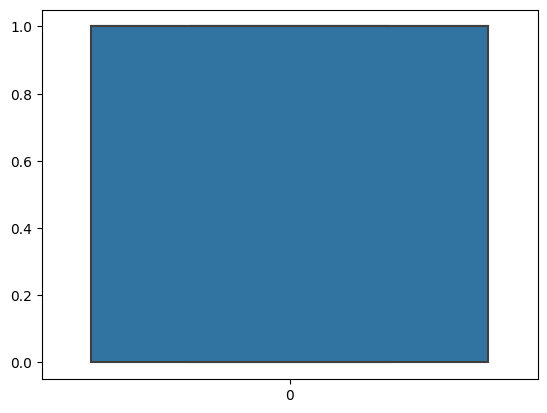

In [195]:
sns.boxplot(df['Churn'])

<Axes: >

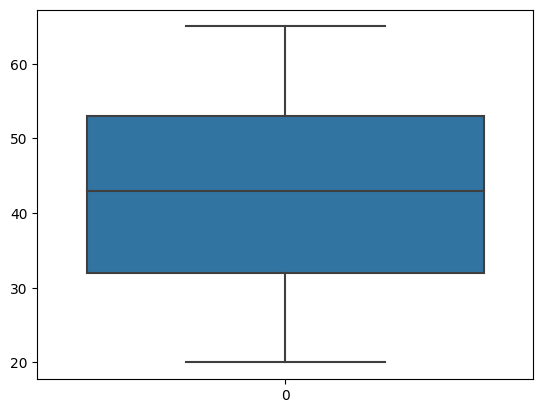

In [196]:
sns.boxplot(df['Age'])

<Axes: xlabel='Age', ylabel='Count'>

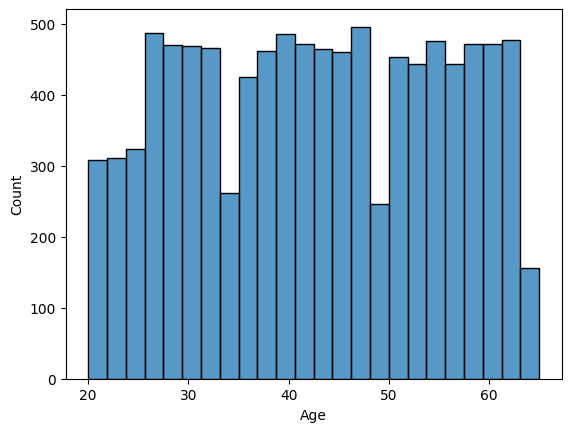

In [197]:
sns.histplot(df.reset_index()['Age'])

<Axes: xlabel='Location', ylabel='Count'>

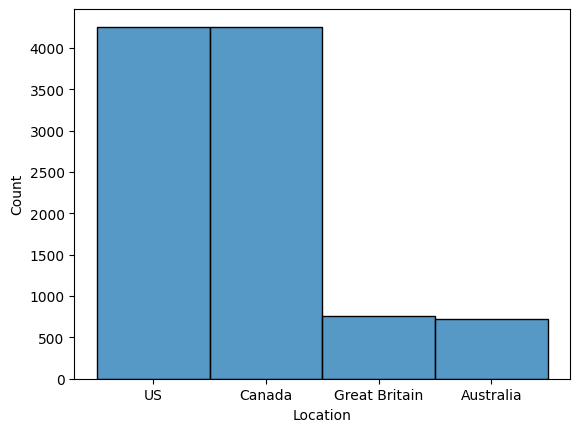

In [198]:
sns.histplot(df.reset_index()['Location'])

<Axes: xlabel='Device', ylabel='Count'>

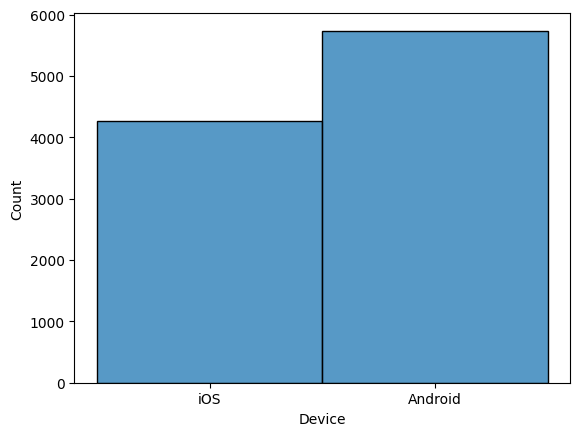

In [199]:
sns.histplot(df.reset_index()['Device'])

In [200]:
df.head()

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
0,0,1,46,US,iOS,756.005761,39,2,582.023075,92,...,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
1,1,2,52,US,iOS,594.838157,59,0,251.269898,33,...,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
2,2,3,43,Canada,Android,453.217405,21,3,124.178946,92,...,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
3,3,4,41,US,iOS,621.453170,95,1,134.362559,46,...,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
4,4,5,41,US,iOS,660.735119,48,5,713.265527,54,...,178.143438,85,1,574.382094,34,2,544.981985,28,2,1


In [201]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.set_index('CustomerID', inplace=True)
df.head()


,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
CustomerID,,,,,,,,,,,,,,,,,,,,,
1,46,US,iOS,756.005761,39,2,582.023075,92,2,212.323540,...,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
2,52,US,iOS,594.838157,59,0,251.269898,33,2,186.909752,...,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
3,43,Canada,Android,453.217405,21,3,124.178946,92,0,316.492407,...,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
4,41,US,iOS,621.453170,95,1,134.362559,46,5,162.945529,...,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
5,41,US,iOS,660.735119,48,5,713.265527,54,2,736.904463,...,178.143438,85,1,574.382094,34,2,544.981985,28,2,1


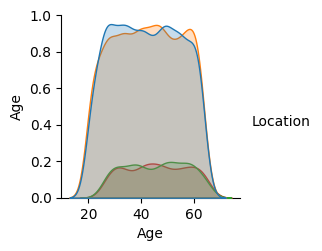

In [202]:
sns.pairplot(df[['Age', 'Device','Location']], hue='Location')

## Data exploration

## model development

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

In [204]:
df.columns

Index(['Age', 'Location', 'Device', 'Month_1_Spend', 'Month_1_Items',
       'Month_1_Support_Calls', 'Month_2_Spend', 'Month_2_Items',
       'Month_2_Support_Calls', 'Month_3_Spend', 'Month_3_Items',
       'Month_3_Support_Calls', 'Month_4_Spend', 'Month_4_Items',
       'Month_4_Support_Calls', 'Month_5_Spend', 'Month_5_Items',
       'Month_5_Support_Calls', 'Month_6_Spend', 'Month_6_Items',
       'Month_6_Support_Calls', 'Month_7_Spend', 'Month_7_Items',
       'Month_7_Support_Calls', 'Month_8_Spend', 'Month_8_Items',
       'Month_8_Support_Calls', 'Month_9_Spend', 'Month_9_Items',
       'Month_9_Support_Calls', 'Month_10_Spend', 'Month_10_Items',
       'Month_10_Support_Calls', 'Month_11_Spend', 'Month_11_Items',
       'Month_11_Support_Calls', 'Month_12_Spend', 'Month_12_Items',
       'Month_12_Support_Calls', 'Churn'],
      dtype='object')

In [205]:
from sklearn.preprocessing import LabelEncoder

In [206]:
# Encoding categorical variables using Label Encoder
label_encoders = {}
for column in ['Location', 'Device',]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [207]:
# Splitting the dataset into features and target variable
x = df[['Age','Location','Device','Month_1_Support_Calls','Month_2_Support_Calls','Month_3_Support_Calls','Month_4_Support_Calls','Month_5_Support_Calls','Month_6_Support_Calls','Month_7_Support_Calls','Month_8_Support_Calls','Month_9_Support_Calls','Month_10_Support_Calls','Month_11_Support_Calls','Month_12_Support_Calls']]
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1234)

In [208]:
df.head()

,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
CustomerID,,,,,,,,,,,,,,,,,,,,,
1,46,3,1,756.005761,39,2,582.023075,92,2,212.323540,...,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
2,52,3,1,594.838157,59,0,251.269898,33,2,186.909752,...,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
3,43,1,0,453.217405,21,3,124.178946,92,0,316.492407,...,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
4,41,3,1,621.453170,95,1,134.362559,46,5,162.945529,...,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
5,41,3,1,660.735119,48,5,713.265527,54,2,736.904463,...,178.143438,85,1,574.382094,34,2,544.981985,28,2,1


In [209]:
#dummy random forest with all variables
dum_random_forest = RandomForestClassifier()
dum_random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [210]:
random_forest_pred = dum_random_forest.predict(x_test)
average_method = 'macro'
print('Randome Forest accuracy_score:', accuracy_score(random_forest_pred, y_test))
print('Randome Forest  f1_score', f1_score(random_forest_pred, y_test,average=average_method))
print(' Randome Forest precision_score:' , precision_score(random_forest_pred, y_test,average=average_method))
print('Randome Forest  recall_score:' , recall_score(random_forest_pred, y_test,average=average_method))

Randome Forest accuracy_score: 0.848
Randome Forest  f1_score 0.7870477391334805
 Randome Forest precision_score: 0.7578450960803902
Randome Forest  recall_score: 0.858283602909655


In [211]:

random_forest_pred = dum_random_forest.predict(x_test)
print('Randome Forest accuracy_score:', accuracy_score(random_forest_pred, y_test))
print('Randome Forest  f1_score', f1_score(random_forest_pred, y_test))
print(' Randome Forest precision_score:' , precision_score(random_forest_pred, y_test))
print('Randome Forest  recall_score:' , recall_score(random_forest_pred, y_test))

Randome Forest accuracy_score: 0.848
Randome Forest  f1_score 0.9009771986970684
 Randome Forest precision_score: 0.9684873949579832
Randome Forest  recall_score: 0.8422655298416565


## Feature engineering

In [212]:
df['Churn'].unique()

array([1, 0], dtype=int64)

In [213]:
Churn_dummies = pd.get_dummies(df['Churn'], prefix='Churn', prefix_sep='_')

In [214]:
df = pd.concat([df, Churn_dummies], axis=1)

In [215]:
df

,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,...,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn,Churn_0,Churn_1
CustomerID,,,,,,,,,,,,,,,,,,,,,
1,46,3,1,756.005761,39,2,582.023075,92,2,212.323540,...,0,700.181510,66,3,382.719682,59,0,1,False,True
2,52,3,1,594.838157,59,0,251.269898,33,2,186.909752,...,1,571.331352,28,3,570.203975,89,0,1,False,True
3,43,1,0,453.217405,21,3,124.178946,92,0,316.492407,...,5,198.222684,38,1,187.475764,79,5,1,False,True
4,41,3,1,621.453170,95,1,134.362559,46,5,162.945529,...,3,565.395592,78,1,281.415092,63,4,1,False,True
5,41,3,1,660.735119,48,5,713.265527,54,2,736.904463,...,1,574.382094,34,2,544.981985,28,2,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,35,2,1,496.165324,84,1,735.148231,60,2,656.082890,...,4,672.755957,23,5,710.675753,60,4,0,True,False
9997,59,2,1,138.836616,76,3,673.599667,52,4,665.929803,...,4,379.113761,75,4,870.230372,15,3,0,True,False
9998,45,3,1,533.289217,106,4,367.139990,41,1,249.490470,...,3,633.113010,89,5,624.403650,35,4,0,True,False


In [216]:
df['Avg_Spend_Last_3_Months'] = df[['Month_10_Spend', 'Month_11_Spend', 'Month_12_Spend']].mean(axis=1)
df['Decline_in_Items'] = (df['Month_12_Items'] < df['Month_10_Items']) & (df['Month_11_Items'] < df['Month_10_Items'])
df['Decline_in_Spend'] = (df['Month_12_Spend'] < df['Month_10_Spend']) & (df['Month_11_Spend'] < df['Month_10_Spend'])
df[['Avg_Spend_Last_3_Months', 'Decline_in_Items', 'Decline_in_Spend']].head()


,Avg_Spend_Last_3_Months,Decline_in_Items,Decline_in_Spend
CustomerID,,,
1,454.433006,False,False
2,668.178657,False,True
3,414.748146,False,True
4,417.133610,False,False
5,432.502506,True,False


## model development/evaluation

In [217]:
dum_knn = KNeighborsClassifier()
dum_knn.fit(df[['Age','Location','Device','Month_1_Support_Calls']], df['Churn'])

KNeighborsClassifier()

In [218]:
## Random forest
random_forest_pred = dum_random_forest.predict(x_test)
average_method = 'macro'
print('Randome Forest accuracy_score:', accuracy_score(random_forest_pred, y_test))
print('Randome Forest  f1_score', f1_score(random_forest_pred, y_test,average=average_method))
print(' Randome Forest precision_score:' , precision_score(random_forest_pred, y_test,average=average_method))
print('Randome Forest  recall_score:' , recall_score(random_forest_pred, y_test,average=average_method))

Randome Forest accuracy_score: 0.848
Randome Forest  f1_score 0.7870477391334805
 Randome Forest precision_score: 0.7578450960803902
Randome Forest  recall_score: 0.858283602909655


In [219]:
## KNN
knn_pred = dum_knn.predict(df[['Age','Location','Device','Month_1_Support_Calls']])

In [220]:
print('KNN accuracy_score:', accuracy_score(knn_pred, df['Churn']))
print('KNN f1_score', f1_score(knn_pred, df['Churn']))
print(' KNN precision_score:' , precision_score(knn_pred, df['Churn']))
print('KNN recall_score:' , recall_score(knn_pred, df['Churn']))

KNN accuracy_score: 0.833
KNN f1_score 0.8922024270591273
 KNN precision_score: 0.9872857142857143
KNN recall_score: 0.8138247762600094


In [221]:
knn_params = {
    'n_neighbors': range(1, 11),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [222]:
## Logistic Regression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [223]:
log_pred = log_model.predict(x_test)
average_method = 'macro'
print('accuracy_score:', accuracy_score(log_pred,y_test))
print('f1_score', f1_score(log_pred,y_test,average=average_method))
print('precision_score:' , precision_score(log_pred,y_test,average=average_method))
print('recall_score:' , recall_score(log_pred,y_test,average=average_method))

accuracy_score: 0.759
f1_score 0.6692100433870147
precision_score: 0.6562212297506416
recall_score: 0.7048205147960527



From the above results, the random forest model performs the best in accuracy.So,when judging which features are most important for predicting churn, random forest model is a good choice because it gives us the feature importance. We can use this model to look at the importance of individual features and determine which features are most critical for predicting churn. 

In [224]:

rf_features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)
age_importance = rf_features_df[rf_features_df['Feature'] == 'Age']
age_importance



NameError: name 'feature_names' is not defined

In [ ]:
top_10_features = rf_features_df.head(10)
top_10_features


NameError: name 'rf_features_df' is not defined

<Axes: xlabel='Location', ylabel='Count'>

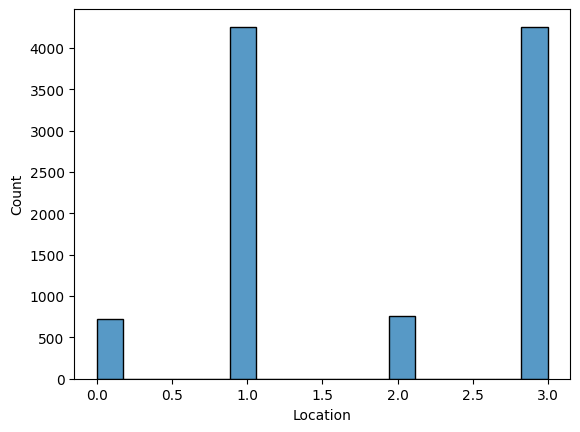

In [ ]:
sns.histplot(df.reset_index()['Location'])

<Axes: xlabel='Device', ylabel='Count'>

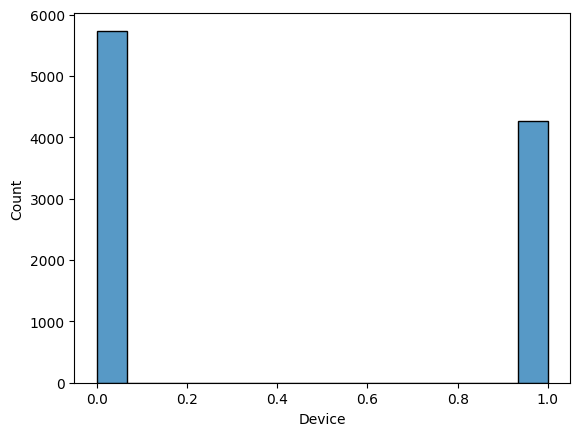

In [ ]:
sns.histplot(df.reset_index()['Device'])

In [ ]:
df.head(50)

,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,...,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn,Churn_0,Churn_1,Avg_Spend_Last_3_Months,Decline_in_Items,Decline_in_Spend
CustomerID,,,,,,,,,,,,,,,,,,,,,
1,46,3,1,756.005761,39,2,582.023075,92,2,212.323540,...,3,382.719682,59,0,1,False,True,454.433006,False,False
2,52,3,1,594.838157,59,0,251.269898,33,2,186.909752,...,3,570.203975,89,0,1,False,True,668.178657,False,True
3,43,1,0,453.217405,21,3,124.178946,92,0,316.492407,...,1,187.475764,79,5,1,False,True,414.748146,False,True
4,41,3,1,621.453170,95,1,134.362559,46,5,162.945529,...,1,281.415092,63,4,1,False,True,417.133610,False,False
5,41,3,1,660.735119,48,5,713.265527,54,2,736.904463,...,2,544.981985,28,2,1,False,True,432.502506,True,False
6,44,1,1,379.341929,102,0,192.801991,78,5,210.853220,...,3,725.195820,90,4,1,False,True,638.620793,False,True
7,59,1,0,648.748331,112,1,869.202422,86,4,533.340947,...,5,295.464474,28,0,1,False,True,444.954005,False,False
8,57,1,1,863.623818,64,4,243.217888,40,1,622.117973,...,1,592.257643,77,0,1,False,True,564.306457,False,True
9,24,1,1,540.084190,73,5,779.503349,78,1,533.322208,...,1,367.026699,43,4,1,False,True,413.415219,False,False


Geography: The geographic location of a customer, especially the Great Britain, Canada, and the US, has a significant correlation with churn.
Customer purchase: The number of items purchased, is a key factor in predicting whether they will churn. Especially the number of items purchased in the month 7,8,9,10,11
Type of device used: Customers using iOS devices have a stronger correlation with churn.